In [1]:
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np
from scipy.stats import uniform,norm,t,binom,expon,chi2,gamma,poisson,beta,dirichlet,triang
from scipy.stats import multivariate_normal as multi_norm
from scipy.optimize import brentq
from scipy.special import perm,comb
import time
import pandas as pd

In [2]:
def bootstrap(S,est,B,gamma=0.1,alpha=0.1):
    parS=est(S)
    
    start=time.time()
    parsBS1=np.zeros(B)
    for i in range(B):
        BS=np.random.choice(S,S.size)
        parsBS1[i]=est(BS)
    
    interval1=(2*parS-np.quantile(parsBS1,1-alpha/2),2*parS-np.quantile(parsBS1,alpha/2))
    end=time.time()
    time1=end-start
    
    start=time.time()
    parsBS2=np.zeros(B)
    for i in range(B):
        BS=np.random.choice(S,int(gamma*S.size))
        parsBS2[i]=est(BS)
        
    parsBS2=parS+(parsBS2-parS)*np.sqrt(gamma)
    interval2=(2*parS-np.quantile(parsBS2,1-alpha/2),2*parS-np.quantile(parsBS2,alpha/2))
    end=time.time()
    time2=end-start
    
    start=time.time()
    parsBS3=np.zeros(B)
    for i in range(B):
        BS=np.random.choice(S,int(gamma*S.size),replace=False)
        parsBS3[i]=est(BS)
        
    parsBS3=parS+(parsBS3-parS)*np.sqrt(gamma)
    interval3=(2*parS-np.quantile(parsBS3,1-alpha/2),2*parS-np.quantile(parsBS3,alpha/2))
    end=time.time()
    time3=end-start
    return interval1,interval2,interval3,parsBS1,parsBS2,parsBS3,time1,time2,time3

def experiment(par,rvs,est,n=2000,B=1000,rep=100):
    count1=0
    count2=0
    count3=0
    count4=0
    count5=0
    count6=0
    count11=0
    count12=0
    count13=0
    count14=0
    count15=0
    count16=0
    for t in range(rep):
        S=rvs(n)
        interval1,interval2,interval3=bootstrap(S,est,B)[0:3]
        count1+=par>=interval1[0] and par<=interval1[1]
        count2+=par>=interval2[0] and par<=interval2[1]
        count3+=par>=max(interval1[0],interval2[0]) and par<=min(interval1[1],interval2[1])
        count4+=interval2[0]>interval1[0]
        count5+=interval2[1]<interval1[1]
        count6+=interval2[1]-interval2[0]<interval1[1]-interval1[0]
        
        count11+=par>=interval1[0] and par<=interval1[1]
        count12+=par>=interval3[0] and par<=interval3[1]
        count13+=par>=max(interval1[0],interval3[0]) and par<=min(interval1[1],interval3[1])
        count14+=interval3[0]>interval1[0]
        count15+=interval3[1]<interval1[1]
        count16+=interval3[1]-interval3[0]<interval1[1]-interval1[0]
        
    print('with replacement:')
    print('original:',count1/rep,'subset:',count2/rep,'overlap:',count3/rep)
    print('left->:',count4/rep,'right<-:',count5/rep,'smaller:',count6/rep)
    print('without replacement:')
    print('original:',count11/rep,'subset:',count12/rep,'overlap:',count13/rep)
    print('left->:',count14/rep,'right<-:',count15/rep,'smaller',count16/rep)
    
def histogram(par,rvs,est,n=10000,B=10000,gamma=0.05,alpha=0.05):
    S=rvs(n)
    interval1,interval2,interval3,parsBS1,parsBS2,parsBS3,time1,time2,time3=bootstrap(S,est,B,gamma,alpha)
    print('target parameter:',par)
    print('sample estimate:',est(S))
    print('original:',interval1,'time:',time1)
    print('with replacement:',interval2,'time:',time2,'ratio:',(interval2[1]-interval2[0])/(interval1[1]-interval1[0]))
    print('without replacement:',interval3,'time:',time3,'ratio:',(interval3[1]-interval3[0])/(interval1[1]-interval1[0]))
    sb.histplot(2*est(S)-parsBS1,color='r',label='normal')
    sb.histplot(2*est(S)-parsBS2,color='b',label='with replacement')
    sb.histplot(2*est(S)-parsBS3,color='g',label='without replacement')
    plt.legend()
    plt.show()

In [3]:
np.random.seed(3033079628)
rvsTM=lambda size: np.array([np.random.choice([norm.rvs(loc=-2),norm.rvs(loc=2)]) for i in range(size)])
cdfTM=lambda x: (norm.cdf(x=x,loc=-2)+norm.cdf(x=x,loc=2))/2
parTM=brentq(lambda x: cdfTM(x)-0.05,-10,10)

**mean**

In [4]:
experiment(norm.mean(),lambda size: norm.rvs(size=size),np.mean)

with replacement:
original: 0.87 subset: 0.86 overlap: 0.86
left->: 0.47 right<-: 0.45 smaller: 0.47
without replacement:
original: 0.87 subset: 0.84 overlap: 0.84
left->: 0.79 right<-: 0.74 smaller 0.92


In [5]:
experiment(gamma.mean(a=1),lambda size: gamma.rvs(a=1,size=size),np.mean)

with replacement:
original: 0.87 subset: 0.88 overlap: 0.87
left->: 0.39 right<-: 0.65 smaller: 0.52
without replacement:
original: 0.87 subset: 0.86 overlap: 0.86
left->: 0.69 right<-: 0.9 smaller 0.88


In [6]:
experiment(0,rvsTM,np.mean)

with replacement:
original: 0.91 subset: 0.92 overlap: 0.91
left->: 0.42 right<-: 0.46 smaller: 0.49
without replacement:
original: 0.91 subset: 0.9 overlap: 0.9
left->: 0.79 right<-: 0.77 smaller 0.83


**median**

In [7]:
experiment(norm.median(),lambda size: norm.rvs(size=size),np.median)

with replacement:
original: 0.89 subset: 0.88 overlap: 0.85
left->: 0.55 right<-: 0.59 smaller: 0.58
without replacement:
original: 0.89 subset: 0.88 overlap: 0.85
left->: 0.63 right<-: 0.65 smaller 0.74


In [8]:
experiment(gamma.median(a=1),lambda size: gamma.rvs(a=1,size=size),np.median)

with replacement:
original: 0.88 subset: 0.89 overlap: 0.87
left->: 0.39 right<-: 0.68 smaller: 0.53
without replacement:
original: 0.88 subset: 0.88 overlap: 0.86
left->: 0.55 right<-: 0.79 smaller 0.69


In [9]:
experiment(0,rvsTM,np.median)

with replacement:
original: 0.81 subset: 0.7 overlap: 0.7
left->: 0.83 right<-: 0.9 smaller: 0.94
without replacement:
original: 0.81 subset: 0.68 overlap: 0.68
left->: 0.91 right<-: 0.96 smaller 0.98


**std**

In [10]:
experiment(norm.std(),lambda size: norm.rvs(size=size),np.std)

with replacement:
original: 0.93 subset: 0.93 overlap: 0.93
left->: 0.65 right<-: 0.35 smaller: 0.5
without replacement:
original: 0.93 subset: 0.92 overlap: 0.92
left->: 0.94 right<-: 0.65 smaller 0.93


In [11]:
experiment(gamma.std(a=1),lambda size: gamma.rvs(a=1,size=size),np.std)

with replacement:
original: 0.93 subset: 0.92 overlap: 0.92
left->: 0.54 right<-: 0.7 smaller: 0.67
without replacement:
original: 0.93 subset: 0.93 overlap: 0.93
left->: 0.85 right<-: 0.85 smaller 0.94


In [12]:
experiment(np.sqrt(5),rvsTM,np.std)

with replacement:
original: 0.86 subset: 0.87 overlap: 0.86
left->: 0.76 right<-: 0.25 smaller: 0.49
without replacement:
original: 0.86 subset: 0.85 overlap: 0.85
left->: 0.97 right<-: 0.58 smaller 0.93


**variance**

In [13]:
experiment(norm.var(),lambda size: norm.rvs(size=size),np.var)

with replacement:
original: 0.91 subset: 0.91 overlap: 0.91
left->: 0.51 right<-: 0.55 smaller: 0.55
without replacement:
original: 0.91 subset: 0.89 overlap: 0.89
left->: 0.89 right<-: 0.87 smaller 0.93


In [14]:
experiment(gamma.var(a=1),lambda size: gamma.rvs(a=1,size=size),np.var)

with replacement:
original: 0.91 subset: 0.92 overlap: 0.9
left->: 0.31 right<-: 0.91 smaller: 0.66
without replacement:
original: 0.91 subset: 0.91 overlap: 0.88
left->: 0.57 right<-: 0.98 smaller 0.94


In [15]:
experiment(5,rvsTM,np.var)

with replacement:
original: 0.9 subset: 0.88 overlap: 0.88
left->: 0.6 right<-: 0.39 smaller: 0.48
without replacement:
original: 0.9 subset: 0.87 overlap: 0.87
left->: 0.88 right<-: 0.74 smaller 0.9


**quantile**

In [16]:
experiment(norm.ppf(0.05),lambda size: norm.rvs(size=size),lambda x: np.quantile(x,0.05))

with replacement:
original: 0.86 subset: 0.85 overlap: 0.82
left->: 0.39 right<-: 0.62 smaller: 0.52
without replacement:
original: 0.86 subset: 0.85 overlap: 0.82
left->: 0.44 right<-: 0.73 smaller 0.7


In [17]:
experiment(gamma.ppf(0.05,a=1),lambda size: gamma.rvs(a=1,size=size),lambda x: np.quantile(x,0.05))

with replacement:
original: 0.86 subset: 0.91 overlap: 0.84
left->: 0.11 right<-: 0.82 smaller: 0.38
without replacement:
original: 0.86 subset: 0.88 overlap: 0.82
left->: 0.2 right<-: 0.89 smaller 0.52


In [18]:
experiment(parTM,rvsTM,lambda x: np.quantile(x,0.05))

with replacement:
original: 0.86 subset: 0.88 overlap: 0.83
left->: 0.37 right<-: 0.7 smaller: 0.58
without replacement:
original: 0.86 subset: 0.85 overlap: 0.81
left->: 0.49 right<-: 0.82 smaller 0.69


**histogram**

target parameter: 0
sample estimate: -0.10941180181994037
original: (-0.4497474915780339, 0.2330681599925435) time: 0.10715436935424805
with replacement: (-0.369745781872705, 0.14256086593772366) time: 0.06919670104980469 ratio: 0.750285449128249
without replacement: (-0.3566867078866454, 0.13196617259729249) time: 0.10431408882141113 ratio: 0.7156439360462281


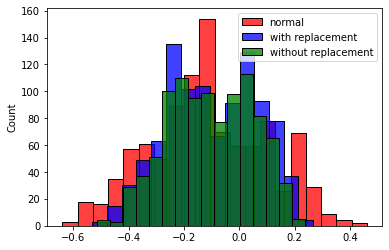

target parameter: 0
sample estimate: 0.03607884226836244
original: (-0.048017366065540856, 0.1566230330209235) time: 0.5904278755187988
with replacement: (-0.05235788830299401, 0.1448034864418605) time: 0.11719298362731934 ratio: 0.9634528452104424
without replacement: (-0.053557627147781756, 0.13783308309843312) time: 0.3770020008087158 ratio: 0.9352537969071725


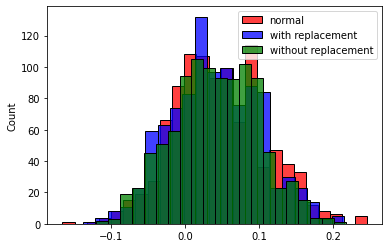

In [19]:
np.random.seed(3033079628)

histogram(0,rvsTM,np.median,n=2000,B=1000,gamma=0.1,alpha=0.1)
histogram(0,rvsTM,np.median,n=20000,B=1000,gamma=0.1,alpha=0.1)